In [1]:
import numpy as np
from scipy.linalg.interpolative import interp_decomp

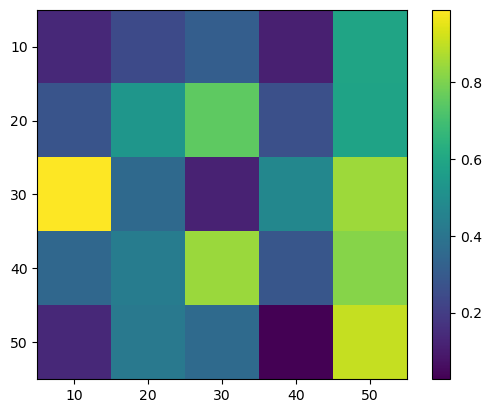

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Creiamo una matrice di esempio
data = np.random.rand(5, 5)
labels = [10,20,30,40,50]

# Creiamo il plot imshow
fig, ax = plt.subplots()
cax = ax.imshow(data, cmap='viridis')

ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

## Aggiungiamo i numeri sopra ogni cella
#for i in range(data.shape[0]):
#    for j in range(data.shape[1]):
#        ax.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white')

# Aggiungiamo la barra dei colori
fig.colorbar(cax)

plt.show()

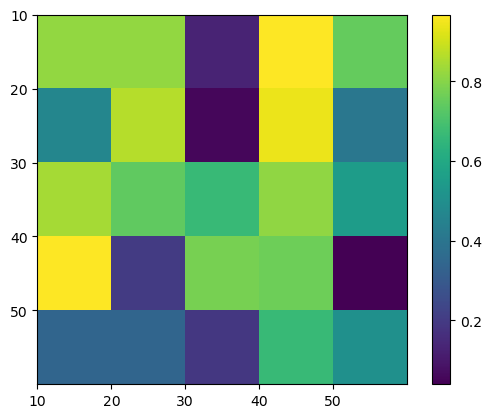

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Creiamo una matrice di esempio
data = np.random.rand(5, 5)
labels = [10, 20, 30, 40, 50]

# Creiamo il plot imshow
fig, ax = plt.subplots()
cax = ax.imshow(data, cmap='viridis')

# Posizioniamo i tick agli inizi delle celle
ax.set_xticks(np.arange(len(labels)) - 0.5, minor=False)
ax.set_yticks(np.arange(len(labels)) - 0.5, minor=False)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Aggiungiamo la barra dei colori
fig.colorbar(cax)

plt.show()


In [7]:
L = 10
for i in range(1, L-1):
    print(i)

1
2
3
4
5
6
7
8


In [2]:
A = np.array([[0,1,2],[3,4,5],[6,7,8]])
i = np.array([0,1,2])

In [3]:
A[2,2]
A[i,i]
i[2]

2

In [4]:
print(A[i[:,None],i[None,:]])
print(A)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [14]:
A = np.array([[0,1,2],[3,4,5],[6,7,8]])
A.reshape(-1).shape

for evals in A.shape:
    evals*=evals
print(A.shape)
print(evals)

(3, 3)
9


In [10]:
A = (A,)*10
A = np.array(A)
print(A.shape)

(10, 3, 3)


### Check that Interpolative Decomposition works with complex matrices

In [8]:
# Define a 2x5 random complex matrix
rows, cols = 5, 2
real_part = np.random.rand(rows, cols)  # Random real part
imag_part = np.random.rand(rows, cols)  # Random imaginary part

# Combine them into a complex matrix
m1 = real_part + 1j * imag_part

real_part = np.random.rand(cols, rows)  # Random real part
imag_part = np.random.rand(cols, rows)  # Random imaginary part

m2 = real_part + 1j * imag_part

m_tot = m1 @ m2

In [9]:
# Use scipy's implementation of the interpolative decomposition
# Instead of the matrix cross interpolation M = C @ P^-1 @ R
# it factorizes as M = A @ P with A = M[:, idx]
def interpolative_decomposition(M, eps_or_k=1e-5, k_min=2):
    r = min(M.shape)
    if r <= k_min:
        k = r
        idx, proj = interp_decomp(M, eps_or_k=k) #eps_or_k = precision of decomposition
    elif isinstance(eps_or_k, int): #checks if eps is an integer
        k = min(r, eps_or_k)
        idx, proj = interp_decomp(M, eps_or_k=k)
    else:
        k, idx,  proj = interp_decomp(M, eps_or_k=eps_or_k)
        if k <= k_min:
            k = min(r, k_min) #is it not enough to put k = k_min? 
                              #r>k_min otherwise first condition would have been true
            idx, proj = interp_decomp(M, eps_or_k=k)
    A = M[:, idx[:k]]
    P = np.concatenate([np.eye(k), proj], axis=1)[:, np.argsort(idx)]
    return A, P, k, idx[:k]

# k is the 'compressed' rank = number of pivot columns
# idx is the array with entries the indeces of the pivot columns
# proj = matrix R s.t. M[:,idx[:k]]*R = M[:,idx[k:]] 
# P = matrix s.t.  M[:,idx[:k]]*P = M (approximated)

In [10]:
A, P, k, idx = interpolative_decomposition(m_tot, eps_or_k=2)

m_interp = A @ P

print(m_interp)
print()
print(m_tot)

[[ 0.32859322+0.34442887j  0.13426369+0.98188034j  0.72786089+0.75383778j
   0.2430558 +0.94006694j -0.00824579+1.0023754j ]
 [ 0.06371897+0.08348594j -0.12787062+0.27253781j  0.1742689 +0.23161466j
   0.05859095+0.36864125j -0.06160455+0.2615074j ]
 [ 0.07774328+0.32779815j -0.3638733 +0.33289388j  0.0579081 +0.78535203j
  -0.54934593+0.69264794j -0.45102862+0.51999849j]
 [ 0.12397673+0.44324962j -0.31073839+0.56248006j  0.14271544+0.99445637j
  -0.57874893+0.81399864j -0.51507048+0.73445514j]
 [ 0.39260267+0.39548994j -0.29904778+0.66965788j  0.72015015+1.09708512j
  -0.31738421+1.50440194j -0.23255075+1.09742329j]]

[[ 0.32859322+0.34442887j  0.13426369+0.98188034j  0.72786089+0.75383778j
   0.2430558 +0.94006694j -0.00824579+1.0023754j ]
 [ 0.06371897+0.08348594j -0.12787062+0.27253781j  0.1742689 +0.23161466j
   0.05859095+0.36864125j -0.06160455+0.2615074j ]
 [ 0.07774328+0.32779815j -0.3638733 +0.33289388j  0.0579081 +0.78535203j
  -0.54934593+0.69264794j -0.45102862+0.51999849j

In [3]:
class function:  # certain function f(x) with x given as binary

    def __init__(self, f):
        self.cache = {}
        self.f = f #store function passed during instantiation


    def __call__(self, *args, **kwds):
        
        if args in self.cache:
            return self.cache[*args]
        else:
            val = self.f(*args)
            self.cache[*args] = val
            return val
    
    def cache_size(self): #size of cache = number of current evaluations
        return len(self.cache) #return the number of entries in the cache
        


In [6]:
n = 4
test_func = lambda x: np.sin(x)
xs = np.linspace(0, 1, 2**n, endpoint=False)
func_vals = test_func(xs)
func = function(lambda *x: func_vals.reshape((2,) * n)[*x])

In [14]:
func(0,1,1,1)
func(0,1,0,1)
func(0,1,1,1)

print(func.cache_size())

2


In [15]:
for i in range(8,-1,-1):
    print(i)

8
7
6
5
4
3
2
1
0
